In [2]:
# Packages required for this project
import numpy as np
import cv2
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
%matplotlib inline

----------------

### why jupyter notebook crashes with opencv imshow() 

https://medium.com/@mrdatainsight/how-to-use-opencv-imshow-in-a-jupyter-notebook-quick-tip-ce83fa32b5ad

--------------

### To display a video using opencv

cv2.VideoCapture() is the function which reads in the video in mp4 or avi or 
in any other format. Object "cap" is created to store video reading. "a" is initially 
assigned to 1, the idea is the value of "a" will append for every loop in while
loop. The while loop will execute for every frame in the video. For this 
video we have 1500 frames. "check" or "ret" is boolean data type,returns True if python
is able to read the VideoCapture object and if not False is returned and the execution stops. "frame" is the NumPy 
array, it represents the first image of the video captured. 1500 such frames/images will 
be captured one by one. once the "check" returns true, the frame will be displayed by cv2.imshow() 
function. "key" is to generate a new frame after every 30 milliseconds. Once "q" is entered
the windows will be destroyed.

In [2]:
import numpy as np
import cv2
# cv2.VideoCapture is the function which reads in the video in mp4 or avi or any other format
cap = cv2.VideoCapture('traffic3.mp4')
a = 1 # initiate the variable for a = 1 
while True: # while loop will execute the code below as long as check returns True.
    a = a+1 # "a" value will update for each loop i.e for each frame
    check, frame = cap.read() # check/ret have same function of storing boolean values
    cv2.imshow("trafficvideo", frame)
    key = cv2.waitKey(30)
    if key == ord('q'):
        break
print(a) # this will print the number of frames
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.0.0) /io/opencv/modules/highgui/src/window.cpp:350: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'


In the above code, the window showing the video did not close by itself even after asking it to do so by giving cv2.destroyAllWindows() command, had to force close it, hence the error.

----------------------------------------------------------------------------

### Basic information on the video 

In [3]:
# VideoCapture is the function in the openCV library which reads the 
# video and stores in the variable "cap".
# Here the video names is "traffic3.mp4"
cap = cv2.VideoCapture('traffic3.mp4')

OpenCv reads the video in the form of frames, for instance "traffic3.mp4" 
has 1500 frames. Each frame will be read in the form of numpy array.
For gray image/frame the numpy matrix will be of 2 dimensions
i.e rows X columns (default here it is a single channel).
For colour image/frame the numpy matrix will be of 3 dimensions
i.e rows X columns X channels.

In [4]:
# VARIABLES 

# 1. counting the number of frames in the video
frames_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
frames_count = int(frames_count)
frames_count

1500

In [5]:
# 2. conting the number of frames per second in the video
fps = cap.get(cv2.CAP_PROP_FPS)
fps = int(fps)
fps

25

In [6]:
# 3. Width of the video frame
# width = cap.get(3) this produces same results as below 
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
width = int(width)
width

1280

In [7]:
# 4. Height of the video frame
# height = cap.get(4) this produces same results as below 
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
height = int(height)
height

720

--------------------------------------------------------------------------------------------------

### To display first frame only of the entire video using matplotlib.

Every frame in the video will be reduced in size by 50% by using cv2.resize() function. The video will be displayed frame after frame using opencv. A while loop will be incorporated to produce frame after frame for continous display as a video. 

(360, 640, 3)


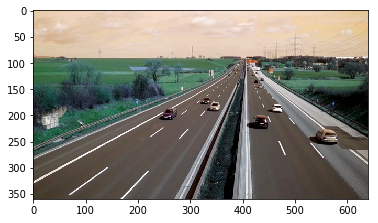

In [99]:
# Image display of first frame same as above but in matplotlib
cap = cv2.VideoCapture('traffic3.mp4')
ret, frame = cap.read()  # import image
    
#percent by which the image is resized
scale_percent = 50
    
#calculate the 50 percent of original dimensions
width = int(frame.shape[1] * scale_percent / 100)
height = int(frame.shape[0] * scale_percent / 100)
dsize = (width, height)
image = cv2.resize(frame,dsize)  # resize image

# image.shape gives (height,width,channels)
print(image.shape)
plt.imshow(image)

### Choosing nth frame to check for fgmask feature to experiment on how to choose a particular frame in the video.

Showing 515th frame in the video 

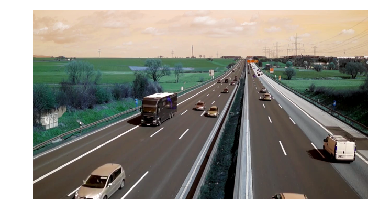

In [4]:
cap = cv2.VideoCapture('traffic3.mp4')
cap.set(1, 515)
ret, frame = cap.read()  # import image

#percent by which the image is resized
scale_percent = 50 

#calculate the 50 percent of original dimensions
width = int(frame.shape[1] * scale_percent / 100)
height = int(frame.shape[0] * scale_percent / 100)
dsize = (width, height)
image = cv2.resize(frame,dsize)  # resize image
plt.axis('off')
plt.imshow(image)

--------------------------

### Variable initialization of the first frame of the video - named as "image"

In [11]:
height2 = image.shape[0]
width2 = image.shape[1]
channels2 = image.shape[2]

In [107]:
image.shape # The three dimension indicate the image being in colour. 

(360, 640, 3)

### Note: 
The height and width computed as shown in few cells from the above one using "cap.get(cv2.CAP_PROP_FRAME_HEIGHT)" and "cap.get(cv2.CAP_PROP_FRAME_WIDTH)"
produces the same result as image.shape[0] and [1] shown in the above cell (excluding the 50% part).

-----------------

### video writer arguments

When a video is being edited like adding a marker representing the centroid of vehicles or drawing a contour around the vehicles using matplotlib all such changes are written/drawn above the video frame. cv2.VideoWriter() function will record all the drawing over the video and will save the edited video. 

syntax for VideoWriter: https://docs.opencv.org/2.4/modules/highgui/doc/reading_and_writing_images_and_video.html#videowriter-videowriter

FourCC is a 4-byte code used to specify the video codec. MJPG is a safe choice for saving video in ".avi" format. 

https://en.wikipedia.org/wiki/FourCC

https://www.fourcc.org/mjpg/ 

For saving video in mp4 format use "*'mp4v'" as argument for fourcc https://stackoverflow.com/questions/30103077/what-is-the-codec-for-mp4-videos-in-python-opencv , however I found mp4 does not save properly.

In [9]:
video = cv2.VideoWriter('traffic_counter.avi', cv2.VideoWriter_fourcc('M', 'J', 'P', 'G'), fps, (height2, width2))

---------------------------------------------------------------------------------------

### Background subtractor

There are three background subtractor to choose from which are Background Subtractors MOG, MOG2 and GMG. MOG and GMG seems to be older version and are not functioning properly, however MOG2 works fine. 
To know more about the types of background subtractors: https://docs.opencv.org/3.3.0/db/d5c/tutorial_py_bg_subtraction.html 

Gaussian Mixture-based Background/Foreground Segmentation Algorithm.

In [5]:
fgbg = cv2.createBackgroundSubtractorMOG2()# create background subtractor

--------------------------------------------

The background subtractor will subtract the static background and focus on moving foreground. It is the better approach to first convert the image/video to gray and then use background subtractor. The visual comparison between color frame with background subtracted (fgmask) of the same frame is shown below using matplotlib. 

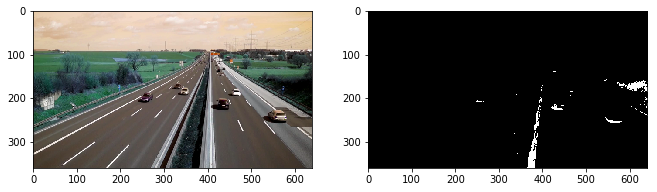

In [7]:
cap = cv2.VideoCapture('traffic3.mp4')
ret, frame = cap.read()  # import image
    
#percent by which the image is resized
scale_percent = 50
    
#calculate the 50 percent of original dimensions
width = int(frame.shape[1] * scale_percent / 100)
height = int(frame.shape[0] * scale_percent / 100)
dsize = (width, height)
image = cv2.resize(frame,dsize) 

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # converts image to gray
fgmask = fgbg.apply(gray)

rcParams['figure.figsize'] = 11 ,8
fig, ax = plt.subplots(1,2)
ax[0].imshow(image);
# cmap - This is the color mapping. If this is not used in this case matplotlib 
# will try to plot the gray images as a RGB image
ax[1].imshow(fgmask, cmap='gray');

--------------------------------------------

### Processing the video for clarity

1. converting each frame/video to gray scale using "cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)"
2. Applying background subtractor algorithm to the video which will take out the static background and show only the moving foreground, this is done by using "cv2.createBackgroundSubtractorMOG2()". The reason for using MOG2 is  https://docs.opencv.org/3.3.0/db/d5c/tutorial_py_bg_subtraction.html (Gaussian Mixture-based Background/Foreground Segmentation Algorithm)
3. Initiating the kernel, which will be used for morphological transformation of each frame in the video. The structural element used in the kernel is ellipse shaped. (5,5) is the shape of the kernel, in simple words matrix of 5 rows and 5 columns. for example refer https://www.mathworks.com/help/images/ref/strel.html to understand ellipse kernel and https://en.wikipedia.org/wiki/Kernel_(image_processing) for kernel in general.
 For morphological shapes 
https://docs.opencv.org/trunk/d4/d86/group__imgproc__filter.html#gac2db39b56866583a95a5680313c314ad
4. Using the kernel above morphological transformations closing, opening and dilation is done on the video. More info can be found in https://docs.opencv.org/trunk/d9/d61/tutorial_py_morphological_ops.html . 

### The main point of applying these transformations is to remove noise, isolate the cars, and make them into solid shapes that can be more easily tracked.


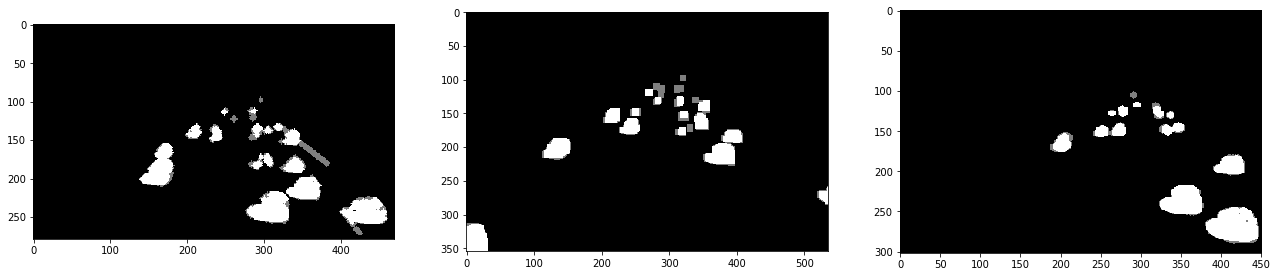

In [13]:
# cross,rectangle and ellipse kernels examples.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
%matplotlib inline
# figure size in inches optional
rcParams['figure.figsize'] = 22 ,16
# read images
img_A = mpimg.imread('cross.png')
img_B = mpimg.imread('rectangle.png')
img_C = mpimg.imread('ellipse.png')
# display images
fig, ax = plt.subplots(1,3)
ax[0].imshow(img_A);
ax[1].imshow(img_B);
ax[2].imshow(img_C);
# The images above show how pixels are modified in cross, square and ellipse shapes. 

### Only back-sub for video "traffic.mp4" 

background subtractor is not perfect and needs some transformations done to it to try and better isolate the moving cars only.

In [1]:
import numpy as np
import cv2
# cv2.VideoCapture is the function which reads in the video in mp4 or avi or any other format
fgbg = cv2.createBackgroundSubtractorMOG2()# create background subtractor
cap = cv2.VideoCapture('traffic3.mp4')
fps = cap.get(cv2.CAP_PROP_FPS)
while True: # while loop will execute the code below as long as check returns True.
    check, frame = cap.read() # check/ret have same function of storing boolean values
    scale_percent = 50 
    #calculate the 50 percent of original dimensions
    width = int(frame.shape[1] * scale_percent / 100)
    height = int(frame.shape[0] * scale_percent / 100)
    dsize = (width, height)
    image = cv2.resize(frame,dsize)  # resize image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # cvideo onverts image to gray
    fgmask = fgbg.apply(gray)
    cv2.imshow("fgmask", fgmask) # change here
    key = cv2.waitKey(int(1000 / fps)) & 0xFF 
    if key == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

<function destroyAllWindows>

waitkey() takes in only millisecons so mathematically the input to waitkey is 1000/fps for the actual speed of "traffic3.mp4". That is because, 1000 millisecond is equal to one second and we have 25 frames per second in our video.

If the input to the waitkey() is a smaller number like, waitkey(5) the speed of the video increases when increased to higher number the video is slow. 

cv2.waitKey() returns a 32 Bit integer value (might be dependent on the platform). The key input is in ASCII which is an 8 Bit integer value. So we only care about these 8 bits and want all other bits to be 0. Thus we use & 0xFF  https://stackoverflow.com/questions/35372700/whats-0xff-for-in-cv2-waitkey1/39201163#39201163

Display of a Frame of the video with Background subtractor

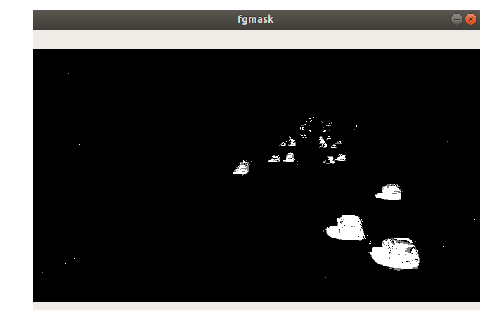

In [9]:
rcParams['figure.figsize'] = 8 ,8
img = mpimg.imread('fgmask.png')
plt.axis('off')
imgplot = plt.imshow(img)

### Background subtractor with closing morphological transformation.

In [1]:
import numpy as np
import cv2
fgbg = cv2.createBackgroundSubtractorMOG2()# create background subtractor
cap = cv2.VideoCapture('traffic3.mp4')
fps = cap.get(cv2.CAP_PROP_FPS)
while True: # while loop will execute the code below as long as check returns True.
    check, frame = cap.read() # check/ret have same function of storing boolean values
    scale_percent = 50 
    #calculate the 50 percent of original dimensions
    width = int(frame.shape[1] * scale_percent / 100)
    height = int(frame.shape[0] * scale_percent / 100)
    dsize = (width, height)
    image = cv2.resize(frame,dsize)  # resize image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # converts image to gray
    fgmask = fgbg.apply(gray)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    closing = cv2.morphologyEx(fgmask, cv2.MORPH_CLOSE, kernel)
    cv2.imshow("fgmask+closing", closing) # change here
    key = cv2.waitKey(int(1000 / fps)) & 0xFF
    if key == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

<function destroyAllWindows>

Display of a Frame of the video with Background subtractor and closing transformation applied

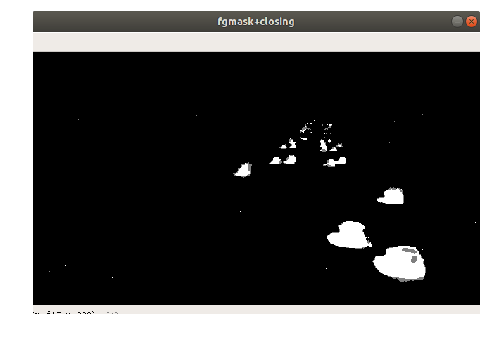

In [8]:
rcParams['figure.figsize'] = 8 ,8
img = mpimg.imread('fgmask+closing.png')
plt.axis('off')
imgplot = plt.imshow(img)

### Background subtractor with closing and opening morphological transformation.

In [1]:
import numpy as np
import cv2
fgbg = cv2.createBackgroundSubtractorMOG2()# create background subtractor
cap = cv2.VideoCapture('traffic3.mp4')
fps = cap.get(cv2.CAP_PROP_FPS)
while True: # while loop will execute the code below as long as check returns True.
    check, frame = cap.read() # check/ret have same function of storing boolean values
    scale_percent = 50 
    #calculate the 50 percent of original dimensions
    width = int(frame.shape[1] * scale_percent / 100)
    height = int(frame.shape[0] * scale_percent / 100)
    dsize = (width, height)
    image = cv2.resize(frame,dsize)  # resize image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # converts image to gray
    fgmask = fgbg.apply(gray)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    closing = cv2.morphologyEx(fgmask, cv2.MORPH_CLOSE, kernel)
    opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)
    cv2.imshow("fgmask+closing+opening", opening) # change here
    key = cv2.waitKey(int(1000 / fps)) & 0xFF
    if key == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

<function destroyAllWindows>

Display of a Frame of the video with Background subtractor, closing and opening transformation applied

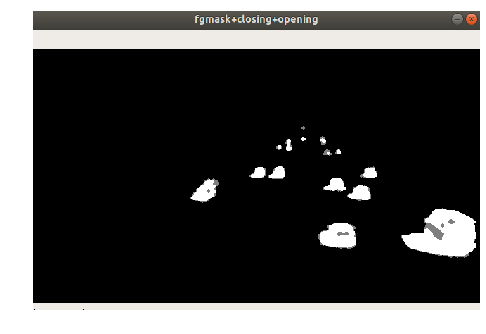

In [7]:
rcParams['figure.figsize'] = 8 ,8
img = mpimg.imread('fgmask+closing+opening.png')
plt.axis('off')
imgplot = plt.imshow(img)

### Background subtractor with closing, opening and dilate morphological transformation.

In [1]:
import numpy as np
import cv2
fgbg = cv2.createBackgroundSubtractorMOG2()# create background subtractor
cap = cv2.VideoCapture('traffic3.mp4')
fps = cap.get(cv2.CAP_PROP_FPS)
while True: # while loop will execute the code below as long as check returns True.
    check, frame = cap.read() # check/ret have same function of storing boolean values
    scale_percent = 50 
    #calculate the 50 percent of original dimensions
    width = int(frame.shape[1] * scale_percent / 100)
    height = int(frame.shape[0] * scale_percent / 100)
    dsize = (width, height)
    image = cv2.resize(frame,dsize)  # resize image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # converts image to gray
    fgmask = fgbg.apply(gray)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    closing = cv2.morphologyEx(fgmask, cv2.MORPH_CLOSE, kernel)
    opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)
    dilation = cv2.dilate(opening, kernel)
    cv2.imshow("fgmask+closing+opening+dilation", dilation) # change here
    key = cv2.waitKey(int(1000 / fps)) & 0xFF
    if key == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

<function destroyAllWindows>

Display of a Frame of the video with Background subtractor, closing, opening and dilate transformation applied

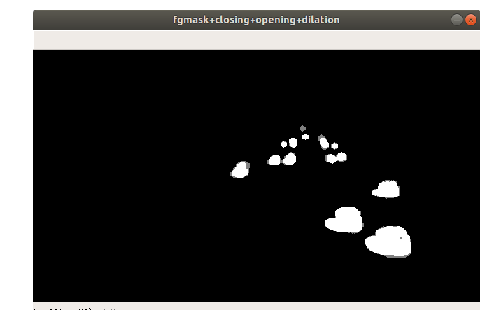

In [6]:
rcParams['figure.figsize'] = 8 ,8
img = mpimg.imread('fgmask+closing+opening+dilation.png')
plt.axis('off')
imgplot = plt.imshow(img)

### Background subtractor with closing, opening, dilate and binary morphological transformation.

The binary transformation is applied to remove any shadows or the gray pixels around the vehicles.

Binary threshold: https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html#additional-resources *and* https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html?highlight=threshold#threshold *and* https://docs.opencv.org/2.4/doc/tutorials/imgproc/threshold/threshold.html#what-is-thresholding

Threshold syntax : (source image, threshold value, max value, threshold type)

Here threshold value is the pixel value and max value is assigned to pixel.

Every value below 220(threshold value) will be set to zero and above 220 to value 255.

0 is for black

255 is white 

220 is threshold closer to 255

In [3]:
import numpy as np
import cv2
fgbg = cv2.createBackgroundSubtractorMOG2()# create background subtractor
cap = cv2.VideoCapture('traffic3.mp4')
fps = cap.get(cv2.CAP_PROP_FPS)
while True: # while loop will execute the code below as long as check returns True.
    check, frame = cap.read() # check/ret have same function of storing boolean values
    scale_percent = 50 
    #calculate the 50 percent of original dimensions
    width = int(frame.shape[1] * scale_percent / 100)
    height = int(frame.shape[0] * scale_percent / 100)
    dsize = (width, height)
    image = cv2.resize(frame,dsize)  # resize image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # converts image to gray
    fgmask = fgbg.apply(gray)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    closing = cv2.morphologyEx(fgmask, cv2.MORPH_CLOSE, kernel)
    opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)
    dilation = cv2.dilate(opening, kernel)
    ret, bins = cv2.threshold(dilation, 220, 255, cv2.THRESH_BINARY)
    cv2.imshow("fgmask+closing+opening+dilation+bins", bins) # removes the shadows(grey parts)
    key = cv2.waitKey(int(1000 / fps)) & 0xFF
    if key == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

<function destroyAllWindows>

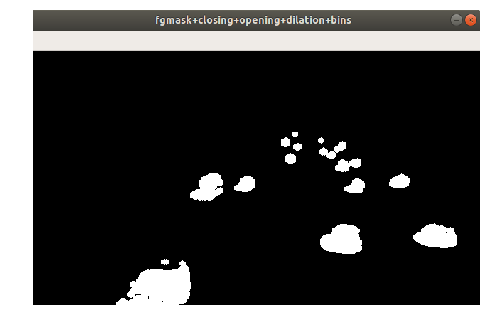

In [5]:
rcParams['figure.figsize'] = 8 ,8
img = mpimg.imread('fgmask+closing+opening+dilation+bins.png')
plt.axis('off')
imgplot = plt.imshow(img)

## Contours and Hierarchy

We have so far made morphological conversions on the video, by doing that we have converted a color video into two dimensional binary image so that python can be now used to get information from the video or to make any changes over them. The next step if to identify the vehicles in the video. This is done by getting the contours, creating a hull on the objects. We will be drawing the contours for our visual understanding.

#### To locate the contours of the binary objects in image/video following syntax is used.
contours, hierarchy = cv2.findContours(bins, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

#### Contours :
Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition. All the contours saved is in a list. Each individual contour is a Numpy array of (x, y) coordinates of boundary points of the object. cv2.findContours() works best with binary images/video.
We require contours here to mark the vehicles with convex hull in the video. 
https://docs.opencv.org/3.3.1/d4/d73/tutorial_py_contours_begin.html

#### Hierarchy: 
Sometimes due to the change in the sunlight/street light on the vehicles opencv may read multiple contours within a contour, that’s when we need hierarchy. Hierarchy gives ranking to the contours based on parent and child positions. for more info visit https://docs.opencv.org/trunk/d9/d8b/tutorial_py_contours_hierarchy.html . All the hierarchy is stored in numpy.ndarray format. OpenCV represents hierarchy as an array of four values : [Next, Previous, First_Child, Parent] . Parent is the main contour which encompasses a vehicles all the contours inside this parent will be the child.

##### RETR_TREE: 
retrieves all of the contours and reconstructs a full hierarchy of nested contours. 
https://docs.opencv.org/trunk/d3/dc0/group__imgproc__shape.html#gga819779b9857cc2f8601e6526a3a5bc71ab10df56aed56c89a026580adc9431f58 .

CHAIN_APPROX_SIMPLE: removes all redundant points and compresses the contour, thereby saving memory.

#### Using the contour points a hull is to be created around objects in the image/video
hull = [cv2.convexHull(c) for c in contours]
https://docs.opencv.org/trunk/dd/d49/tutorial_py_contour_features.html . 
cv2.convexHull() will use the contour points and create an outline i.e. a hull joining the points around the objects.

#### Drawing the contours
So we have an outline hull around the objects, using this outline, contours are drawn using cv2.drawContours(). 
The syntax for drawing contours is explained: 
cv2.drawContours(image, hull, -1, (0, 255, 0), 3)
here -1 is the used to draw all contours, individual contours can also be drawn by giving specific contours number other than -1 as an argument. 
(0,255,0) is the decimal code of (Red,Green,Blue) which is for lime color contour. 3 is the thickness of the contour line. https://www.rapidtables.com/web/color/RGB_Color.html#color-table . 

In [108]:
# Running only the first frame of the video. the contour and hierarchy for the image is
# created. we can see how and what data is stored inside contours and hierarchy.
# There are 9 contours in first frame (might be having contours inside contours) and the number of elements
# in hierarchy is also 9, which are the ranking of the contours.
import numpy as np
import cv2
cap = cv2.VideoCapture('traffic3.mp4')
fps = cap.get(cv2.CAP_PROP_FPS)
fgbg = cv2.createBackgroundSubtractorMOG2()# create background subtractor
check, frame = cap.read() # check/ret have same function of storing boolean values
scale_percent = 50 
#calculate the 50 percent of original dimensions
width = int(frame.shape[1] * scale_percent / 100)
height = int(frame.shape[0] * scale_percent / 100)
dsize = (width, height)
image = cv2.resize(frame,dsize)  # resize image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # converts image to gray
fgmask = fgbg.apply(gray)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
closing = cv2.morphologyEx(fgmask, cv2.MORPH_CLOSE, kernel)
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)
dilation = cv2.dilate(opening, kernel)
ret, bins = cv2.threshold(dilation, 220, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(bins, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [130]:
# example to show contours
print(len(contours))
contours[0][0]

9


array([[382, 285]], dtype=int32)

In [128]:
# example to show hierarchy
print("length of hierarchy:", len(hierarchy))
print(" The first row and last column value is -1:", hierarchy[0, 0, 3] == -1)
hierarchy

length of hierarchy: 1
 The first row and last column value is -1: True


array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 3,  1, -1, -1],
        [ 4,  2, -1, -1],
        [ 5,  3, -1, -1],
        [ 6,  4, -1, -1],
        [ 7,  5, -1, -1],
        [-1,  6,  8, -1],
        [-1, -1, -1,  7]]], dtype=int32)

Because the contours and hierarchy are inside the while loop, in order to view the captured items inside the contour and hierarchy above code is executed without while loop and for the first frame/ image of the video. 

In [5]:
# The drawing of the contours
import numpy as np
import cv2
fgbg = cv2.createBackgroundSubtractorMOG2()# create background subtractor
cap = cv2.VideoCapture('traffic3.mp4')
fps = cap.get(cv2.CAP_PROP_FPS)
while True: # while loop will execute the code below as long as check returns True.
    check, frame = cap.read() # check/ret have same function of storing boolean values
    scale_percent = 50 
    #calculate the 50 percent of original dimensions
    width = int(frame.shape[1] * scale_percent / 100)
    height = int(frame.shape[0] * scale_percent / 100)
    dsize = (width, height)
    image = cv2.resize(frame,dsize)  # resize image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # converts image to gray
    fgmask = fgbg.apply(gray)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    closing = cv2.morphologyEx(fgmask, cv2.MORPH_CLOSE, kernel)
    opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)
    dilation = cv2.dilate(opening, kernel)
    ret, bins = cv2.threshold(dilation, 220, 255, cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(bins, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    hull = [cv2.convexHull(c) for c in contours]
    cv2.drawContours(image, hull, -1, (0, 255, 0), 3)
    cv2.imshow("contour_image", image)
    key = cv2.waitKey(int(1000 / fps)) & 0xFF
    if key == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

<function destroyAllWindows>

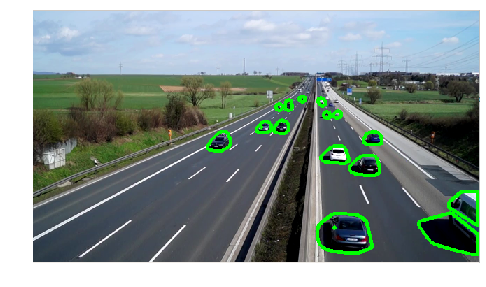

In [4]:
rcParams['figure.figsize'] = 8 ,8
img = mpimg.imread('contours.png')
plt.axis('off')
imgplot = plt.imshow(img)

### Adding the lines to the video frame.
The green line will be used to count the number of vehicles passing it upwards or downwards. The vehicle’s contours above blue line gets mixed up going upwards so only considering the vehicles below this line for counting. The syntax to draw line in the video frame is cv2.line(image, (x1, y1), (x2, y2), (B,G,R), lineThickness). Note that the line is from start of the frame and ends at the end of the frame. x1 will be 0 and x2 will be width of the frame. Y axis is inverted in opencv i.e 0 is at top and height is at bottom. 
Note here (B,G,R) is for blue, green and red color combination.

In [3]:
import numpy as np
import cv2
fgbg = cv2.createBackgroundSubtractorMOG2()# create background subtractor
cap = cv2.VideoCapture('traffic3.mp4')
fps = cap.get(cv2.CAP_PROP_FPS)
while True: # while loop will execute the code below as long as check returns True.
    check, frame = cap.read() # check/ret have same function of storing boolean values
    scale_percent = 50 
    #calculate the 50 percent of original dimensions
    width = int(frame.shape[1] * scale_percent / 100)
    height = int(frame.shape[0] * scale_percent / 100)
    dsize = (width, height)
    image = cv2.resize(frame,dsize)  # resize image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # converts image to gray
    fgmask = fgbg.apply(gray)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    closing = cv2.morphologyEx(fgmask, cv2.MORPH_CLOSE, kernel)
    opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)
    dilation = cv2.dilate(opening, kernel)
    ret, bins = cv2.threshold(dilation, 220, 255, cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(bins, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    hull = [cv2.convexHull(c) for c in contours]
    cv2.drawContours(image, hull, -1, (0,255,255), 2) # changed the color to yellow
    blue_line = 225
    cv2.line(image, (0, blue_line), (width, blue_line), (255,0,0), 5) # lines added
    green_line = 250
    cv2.line(image, (0, green_line), (width, green_line), (0, 255, 0), 5) # lines added
    cv2.imshow("contours+line_image", image)
    key = cv2.waitKey(int(1000 / fps)) & 0xFF
    if key == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

<function destroyAllWindows>

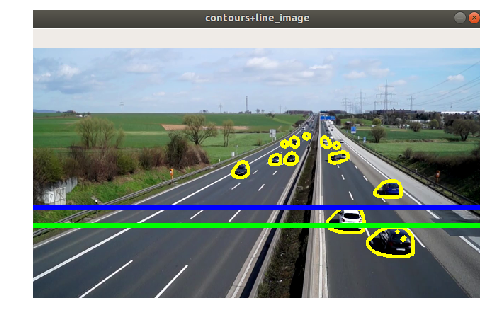

In [5]:
rcParams['figure.figsize'] = 8 ,8
img = mpimg.imread('contours+line.png')
plt.axis('off')
imgplot = plt.imshow(img)

### Selecting the vehicles below the blue line and identifying their centroids.

After drawing the blue and green line,  next focus is on the blue line and how to recognize and capture the centroids of the objects below the blue line only. As explained before in while loop we will be dealing with each frame one by one for the complete video. Each frame will have “n” number of contours and each frame will have a single array of hierarchy levels of the contours. It is explained in https://docs.opencv.org/trunk/d9/d8b/tutorial_py_contours_hierarchy.html . Most of the time a single object may have multiple contours in it. The hierarchy of contours for each object is created as a list in the hierarchy array in the format as below,
#### [Next, Previous, First_Child, Parent]. 
Parent is the main contour which is the outline of an foreground object (white object) and is assigned the value of “-1” by opencv in the hierarchy array . All the contours inside parent contours will be children contours. These children contours are assigned as next, previous or first child positions. Our focus is only to capture the parent contours of the objects which are below the blue line and then find their centroids.  So first setting up a for loop for all contours one by one, then filtering in the contours which are parent only that is those with value “-1”. Then the area of that parent contour is calculated by using  cv2.contourArea() function. Every foreground object in the frame will have contours which means we will also have contours for other objects in the frame along with the vehicles. To select contours of vehicles alone, the area of all the parent contours are compared between the limits of 300 to 50000 for this video, for any other video this range may change. All the area/contours coming under this constraints are selected.  The centroids of such selected contours is identified using cv2.moments(contour)  function. The centroids consist of x and y coordinates.  https://docs.opencv.org/3.1.0/dd/d49/tutorial_py_contour_features.html .  As per the code below cx and cy will be the centroid points of the contour being considered. Next, filtering in the contours whose centroid’s “y” coordinate is below the blue line cy > blueline. As mentioned earlier the y-axis for opencv frame starts from the height being at the bottom(origin) and 0 being at the top. So “cy” has to be greater than blueline which is “225” .  After filtering the contours below blue line, a rectangle is created around such contours to differentiate them from the ones above the blue line. To create rectangle cv2.rectangle() function is used https://docs.opencv.org/3.1.0/dc/da5/tutorial_py_drawing_functions.html . The arguments for this function includes the top left x and y coordinates and also the height and width of the rectangle which are all achieved by using cv2.boundingRect(contour) function. Once the rectangles are added to those contours, text giving the x and y centroid coordinates and marker representing the centroid is included too. For cv2.putText() function font is selected from https://docs.opencv.org/3.1.0/d0/de1/group__core.html#ga0f9314ea6e35f99bb23f29567fc16e11 .
Function cv2.drawMarker() is used to draw marker, line type is selected from https://docs.opencv.org/3.4/d0/de1/group__core.html#gaf076ef45de481ac96e0ab3dc2c29a777 .
Once all the above operations are completed, the filtered contours centroids are saved in the the list of “cxx” and “cyy”. 


In [4]:
import numpy as np
import cv2
fgbg = cv2.createBackgroundSubtractorMOG2()# create background subtractor
cap = cv2.VideoCapture('traffic3.mp4')
fps = cap.get(cv2.CAP_PROP_FPS)
while True: # while loop will execute the code below as long as check returns True.
    check, frame = cap.read() # check/ret have same function of storing boolean values
    scale_percent = 50 
    #calculate the 50 percent of original dimensions
    width = int(frame.shape[1] * scale_percent / 100)
    height = int(frame.shape[0] * scale_percent / 100)
    dsize = (width, height)
    image = cv2.resize(frame,dsize)  # resize image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # converts image to gray
    fgmask = fgbg.apply(gray)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    closing = cv2.morphologyEx(fgmask, cv2.MORPH_CLOSE, kernel)
    opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)
    dilation = cv2.dilate(opening, kernel)
    ret, bins = cv2.threshold(dilation, 220, 255, cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(bins, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    hull = [cv2.convexHull(c) for c in contours]
    cv2.drawContours(image, hull, -1, (0,255,255), 2) # changed the color to yellow
    blue_line = 225
    cv2.line(image, (0, blue_line), (width, blue_line), (255,0,0), 5) 
    green_line = 250
    cv2.line(image, (0, green_line), (width, green_line), (0, 255, 0), 5)
    # min area for contours in case a bunch of small noise contours are created
    minarea = 300
    # max area for contours, can be quite large for buses
    maxarea = 50000
    # vectors for the x and y locations of contour centroids in current frame
    cxx = np.zeros(len(contours))
    cyy = np.zeros(len(contours))
    for i in range(len(contours)):  # cycles through all contours in current frame
        if hierarchy[0, i, 3] == -1:  # using hierarchy to only count parent contours (contours not within others)
            area = cv2.contourArea(contours[i])  # area of contour
            if minarea < area < maxarea:  # area threshold for contour
                # calculating centroids of contours
                cnt = contours[i]
                M = cv2.moments(cnt)
                cx = int(M['m10'] / M['m00'])
                cy = int(M['m01'] / M['m00'])
                if cy > blue_line:  # filters out contours that are above line (y starts at top)
                    # gets bounding points of contour to create rectangle
                    # x,y is top left corner and w,h is width and height
                    x, y, w, h = cv2.boundingRect(cnt)
                    # creates a rectangle around contour
                    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
                    cv2.putText(image, str(cx) + "," + str(cy), (cx + 10, cy + 10), cv2.FONT_HERSHEY_SIMPLEX,.3, (0, 0, 255), 1)
                    cv2.drawMarker(image, (cx, cy), (0, 0, 255), cv2.MARKER_STAR, markerSize=5, thickness=1,line_type=cv2.LINE_AA)
                    # adds centroids that passed previous criteria to centroid list
                    cxx[i] = cx
                    cyy[i] = cy
    # eliminates zero entries (centroids that were not added)
    cxx = cxx[cxx != 0]
    cyy = cyy[cyy != 0]
     
    cv2.imshow("contours+line_image", image)
    key = cv2.waitKey(int(1000 / fps)) & 0xFF
    if key == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

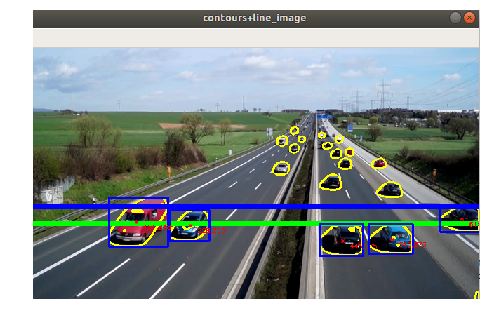

In [5]:
rcParams['figure.figsize'] = 8 ,8
img = mpimg.imread('centroid.png')
plt.axis('off')
imgplot = plt.imshow(img)

I believe that all the steps done so far are essential and initial steps for vehicle counting using opencv and python. Once we get the centroids of the vehicles we can use it in any way using python to count the vehicles. I will be using the same steps above to transform other video morphologically using opencv and then use the centroids to count the vehicles. In the other video I will be counting the vehicles which go straight and also other vehicles which joins the straight road from other road. The entire code for other video will be executed through shell as notebook does not operate well with opencv.